In [2]:
#Python Program for analysis of equity portfolio
#Analysis of returns, volatility and other factors

In [3]:
#importing required libraries
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
#Defining stocks in portfolio
#1.TSLA(TESLA) 2.AAPL(APPLE) 3.NFLX(NETFLIX) 4.WALT DISNEY CO(DIS) 5.XOM(EXXON MOBIL)
#importing historical data for 1 year for these stocks
tsla = pd.read_csv('TESLA.csv')
aapl = pd.read_csv('APPLE.csv')
nflx = pd.read_csv('NETFLIX.csv')
dis = pd.read_csv('DISNEY.csv')
xom = pd.read_csv('EXXON.csv')

In [8]:
stock_symbols = ["TSLA","AAPL","NFLX","DIS","XOM"]
portfolio_count = len(stock_symbols)
init_weights = 1/portfolio_count
print("The weight assigned to all",portfolio_count,"stocks in the portfolio is",init_weights,"each.")

The weight assigned to all 5 stocks in the portfolio is 0.2 each.


In [9]:
port_weights = [init_weights,init_weights,init_weights,init_weights,init_weights]

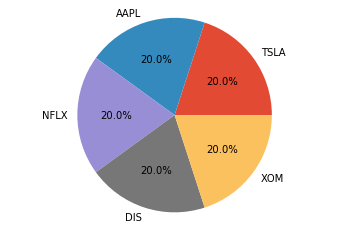

In [13]:
#visualizing initial portfolio
fig1, ax1 = plt.subplots()
ax1.pie(port_weights, labels=stock_symbols,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

In [16]:
#Creating a dataframe containing the adjusted closing prices of all stocks in the portfolio
df = pd.DataFrame()
df['Date'] = tsla['Date']
df['Tesla'] = tsla['Adj Close']
df['Apple'] = aapl['Adj Close']
df['Netflix'] = nflx['Adj Close']
df['Disney'] = dis['Adj Close']
df['Exxon'] = xom['Adj Close']

In [18]:
df = df.set_index('Date')

In [19]:
df.head()

,Tesla,Apple,Netflix,Disney,Exxon
Date,,,,,
2019-07-05,233.100006,201.821350,380.549988,141.601624,71.854218
2019-07-08,230.339996,197.661011,376.160004,140.180145,72.184570
2019-07-09,230.059998,198.866638,379.929993,140.766632,72.137367
2019-07-10,238.919998,200.833160,381.000000,142.685135,73.156715
2019-07-11,238.600006,199.370621,379.500000,142.705017,73.213348


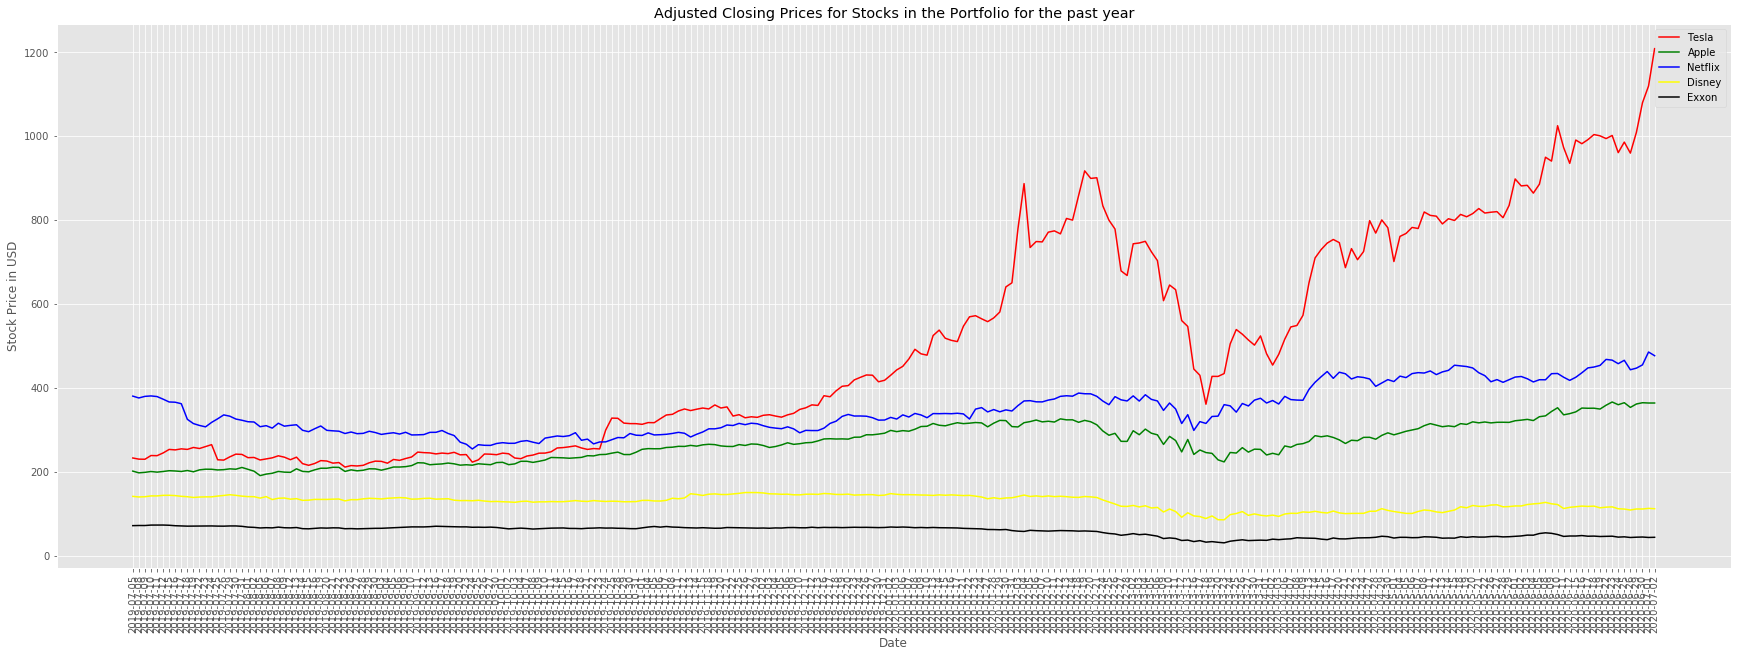

In [38]:
#Visualising the change in stock prices over past year
plt.figure(figsize=(30,10))
plt.plot(df['Tesla'],label='Tesla',color='red')
plt.plot(df['Apple'],label='Apple',color='green')
plt.plot(df['Netflix'],label='Netflix',color='blue')
plt.plot(df['Disney'],label='Disney',color='yellow')
plt.plot(df['Exxon'],label='Exxon',color='black')
plt.title("Adjusted Closing Prices for Stocks in the Portfolio for the past year")
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Stock Price in USD')
plt.legend()
plt.show()

In [27]:
#Calculating daily returns on all stocks
daily_returns = df.pct_change(1)

In [28]:
daily_returns

,Tesla,Apple,Netflix,Disney,Exxon
Date,,,,,
2019-07-05,NaN,NaN,NaN,NaN,NaN
2019-07-08,-0.011840,-0.020614,-0.011536,-0.010039,0.004598
2019-07-09,-0.001216,0.006099,0.010022,0.004184,-0.000654
2019-07-10,0.038512,0.009889,0.002816,0.013629,0.014131
2019-07-11,-0.001339,-0.007282,-0.003937,0.000139,0.000774
...,...,...,...,...,...
2020-06-26,-0.026613,-0.030726,-0.048314,-0.020295,-0.034315
2020-06-29,0.051691,0.023047,0.008660,0.022181,0.016048
2020-06-30,0.069807,0.008348,0.017440,-0.000090,0.009025


In [30]:
#Finding the correlation matrix for stock returns
'''
The correlation coefficient is measured on a scale from -1 to 1.
A correlation coefficient of 1 indicates a perfect positive correlation between the prices of two stocks,
meaning the stocks always move the same direction by the same amount. 
A coefficient of -1 indicates a perfect negative correlation,
meaning that the stocks have historically always moved in the opposite direction. 
If two stocks have a correlation coefficient of 0, it means there is no correlation and,
therefore, no relationship between the stocks.
'''
daily_returns.corr()

,Tesla,Apple,Netflix,Disney,Exxon
Tesla,1.000000,0.466471,0.358888,0.449966,0.385020
Apple,0.466471,1.000000,0.537086,0.689512,0.647278
Netflix,0.358888,0.537086,1.000000,0.360021,0.289059
Disney,0.449966,0.689512,0.360021,1.000000,0.691132
Exxon,0.385020,0.647278,0.289059,0.691132,1.000000


In [31]:
#Finding the covariance matrix for stock returns
'''
The covariance matrix is used to calculate the standard deviation of a portfolio of stocks,
which in turn is used by portfolio managers to quantify the risk associated with a particular portfolio.
The diagonal elements are a measure of a stock return's deviation from average returns for that stock
Covariance is a measure of the joint variability of two random variables.
If the two variables increase and decrease simultaneously then the covariance value will be positive.
Conversely if one increases while the other decreases then the covariance will be negative.
Higher the variance of the asset price, higher the risk and volatility
'''
daily_returns.cov()

,Tesla,Apple,Netflix,Disney,Exxon
Tesla,0.002409,0.000586,0.000469,0.000613,0.000551
Apple,0.000586,0.000655,0.000366,0.000490,0.000483
Netflix,0.000469,0.000366,0.000710,0.000266,0.000225
Disney,0.000613,0.000490,0.000266,0.000771,0.000560
Exxon,0.000551,0.000483,0.000225,0.000560,0.000851


In [33]:
#Covariances are used to determine efficient frontier according to modern portfolio theory
#Efficient frontier is used to find a portfolio that maximizes the returns for a certain level of risk

In [34]:
#checking variance of stock returns for individual stocks
daily_returns.var()

Tesla      0.002409
Apple      0.000655
Netflix    0.000710
Disney     0.000771
Exxon      0.000851
dtype: float64

In [36]:
#Determining the volatility in returns for individual stocks
#We use the standard deviation for the same
daily_returns.std()

Tesla      0.049077
Apple      0.025591
Netflix    0.026653
Disney     0.027768
Exxon      0.029164
dtype: float64

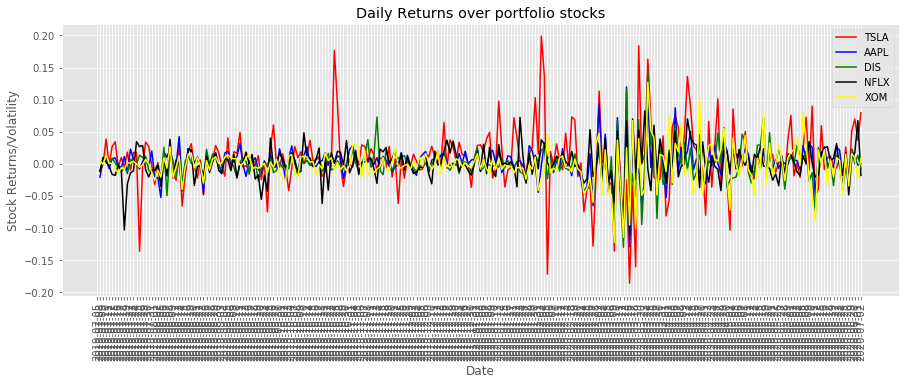

In [44]:
#Visualizing stock returns over past year
plt.figure(figsize=(15,5))
plt.plot(daily_returns['Tesla'],color='red',label='TSLA')
plt.plot(daily_returns['Apple'],color='blue',label='AAPL')
plt.plot(daily_returns['Disney'],color='green',label='DIS')
plt.plot(daily_returns['Netflix'],color='black',label='NFLX')
plt.plot(daily_returns['Exxon'],color='yellow',label='XOM')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title('Daily Returns over portfolio stocks')
plt.ylabel('Stock Returns/Volatility')
plt.legend()
plt.show()

In [46]:
#Finding the average daily returns of all stocks in the portfolio
mean_daily_returns = daily_returns.mean()
print("The mean returns for our portfolio of stocks is:\n",mean_daily_returns)

The mean returns for our portfolio of stocks is:
 Tesla      0.007778
Apple      0.002681
Netflix    0.001256
Disney    -0.000543
Exxon     -0.001518
dtype: float64


In [49]:
#Reassigning weights to portfolio and calculating expected returns
#Tesla: 30%
#Apple:25%
#Netflix: 20%
#Disney: 15%
#Exxon: 10%
new_Weights = np.array([0.3,0.25,0.2,0.15,0.1])
expected_return = np.sum(mean_daily_returns*new_Weights)
print('Expected portfolio return=',expected_return)

Expected portfolio return= 0.0030213853688113752


In [50]:
#Calculate returns on existing portfolio
current_returns = np.sum(mean_daily_returns*init_weights)
print('Current portfolio return=',current_returns)

Current portfolio return= 0.001930574020923849


In [51]:
#To annualise portfolio returns, multiply daily returns by number of trading days/year (~252)
annualized_expected_return = 252*expected_return
print('Annual returns on original portfolio=',(252*current_returns))
print('Expected annual returns on revised portfolio=',annualized_expected_return)

Annual returns on original portfolio= 0.48650465327280995
Expected annual returns on revised portfolio= 0.7613891129404665


In [53]:
#Calculating growth of the investment
#Initiate a $1 investment in all stocks and multiply by daily retuns to track change in the investment
cumulative_returns = (daily_returns+1).cumprod()
cumulative_returns

,Tesla,Apple,Netflix,Disney,Exxon
Date,,,,,
2019-07-05,NaN,NaN,NaN,NaN,NaN
2019-07-08,0.988160,0.979386,0.988464,0.989961,1.004598
2019-07-09,0.986958,0.985360,0.998371,0.994103,1.003941
2019-07-10,1.024968,0.995104,1.001183,1.007652,1.018127
2019-07-11,1.023595,0.987857,0.997241,1.007792,1.018915
...,...,...,...,...,...
2020-06-26,4.117289,1.752193,1.165156,0.770471,0.607062
2020-06-29,4.330116,1.792575,1.175246,0.787562,0.616804
2020-06-30,4.632390,1.807539,1.195743,0.787491,0.622371


In [54]:
#Tesla, Apple and Netflix give positive returns while Disney and Exxon give negative returns.
#Therefore they can be removed from the portfolio or given a lesser weight, when analysing over a one year period.

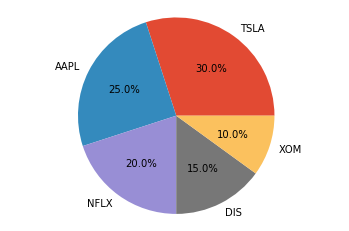

In [55]:
#Visualizing the revised portfolio
fig1, ax1 = plt.subplots()
ax1.pie(new_Weights, labels=stock_symbols,autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

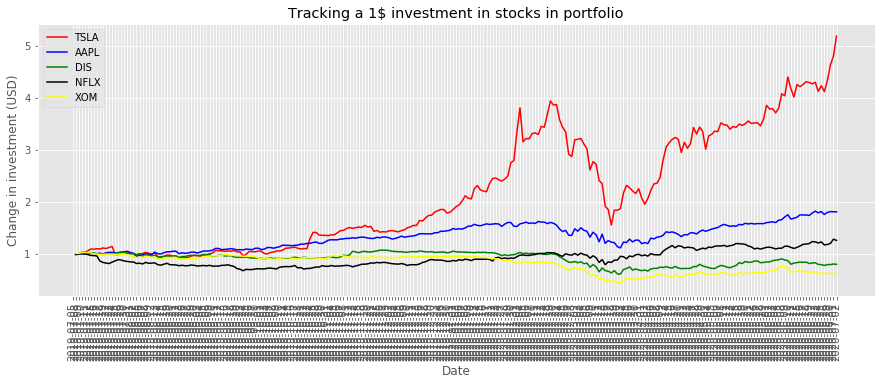

In [56]:
#Visualizing the change in the investment in each stock
plt.figure(figsize=(15,5))
plt.plot(cumulative_returns['Tesla'],color='red',label='TSLA')
plt.plot(cumulative_returns['Apple'],color='blue',label='AAPL')
plt.plot(cumulative_returns['Disney'],color='green',label='DIS')
plt.plot(cumulative_returns['Netflix'],color='black',label='NFLX')
plt.plot(cumulative_returns['Exxon'],color='yellow',label='XOM')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title('Tracking a 1$ investment in stocks in portfolio')
plt.ylabel('Change in investment (USD)')
plt.legend()
plt.show()